# Example 1

In [2]:
#Step 1: We begin by importing the necessary libraries
import numpy as np 

In [6]:
#Step 2: Calculate mean, standard deviation
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]#our data
mean = np.mean(data)#Calculates the mean
std = np.std(data)#Calculated Standard deviation
print('mean:', mean)
print('std. dev:', std)

mean: 2.6666666666666665
std. dev: 3.3598941782277745


In [5]:
#Step 3: Calculate Z score. If Z score>3, print it as an outlier.
threshold = 3 #This is the threshold we have choosen
outlier = []#List to hold the outliers
for i in data:#Loop through the data
    z = (i-mean)/std#Calculates the z score
    if z > threshold:
        #Append to list if its z score > than threshold 3
        outlier.append(i)
print('Outlier(s) is/are', outlier)

Outlier(s) is/are [15]


# Example 2

In [7]:
#Step 1: import necessary libraries.
import pandas as pd
import seaborn as sn

In [34]:
#This part reads the CSV
df = pd.read_csv("height.csv")
df.head()

,Gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


###### Lets look at how to do this using standard deviation

In [35]:
df.describe()#Give descriptive stats of the data

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<AxesSubplot:ylabel='Count'>

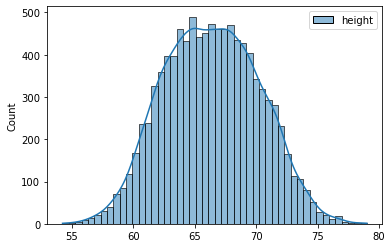

In [36]:
#To confirm whether the data is normally distributed,
#We can have a histogram
sn.histplot(df, kde=True)

In [37]:
#Let's recalculate the mean and std dev for use later
mean = df.mean()
mean

height    66.36756
dtype: float64

In [38]:
std_deviation = df.std()
std_deviation

height    3.847528
dtype: float64

In [39]:
#This gives the lower bound
mean-3*std_deviation

height    54.824975
dtype: float64

In [40]:
#This gives the upper bound
mean+3*std_deviation

height    77.910144
dtype: float64

In [42]:
#To show the data points that are outliers
df[(df["height"] < 54.82) | (df["height"] > 77.91)]

,Gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [43]:
#Creating a new dataframe without the outliers
df_no_outlier = df[(df["height"]<77.91) & (df["height"]>54.82)]
df_no_outlier.shape

(9993, 2)

#### Using Z Score

Z score can be used to do the same thing we have done before. 
We have seen that our mean is 66.37 and standard deviation is 3.84.

If we have a datapoint = 77.91, its Z score is 3 as shown in this calculation.
(77.91 = 66.37 + 3 * 3.84)
We will add a new column and calculate the Z score for each data item

In [44]:
df['zscore'] = ( df["height"]- df["height"].mean() ) / df["height"].std()
df.head(5)

,Gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [45]:
#Getting data points above 3std from mean
df[df['zscore']>3]

,Gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [47]:
#Getting data points above 3std below mean
df[df['zscore']<-3]

,Gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


# Example 3 - Using Multivariate Normal Distribution

In [77]:
#We will begin by importing the libraries we need
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [78]:
#Next we will create custom dataset with 2 variables
#define x1 and x2
x1 = np.arange(1,50,1)
x2 = np.square(x1) + np.random.randint(-200,200)

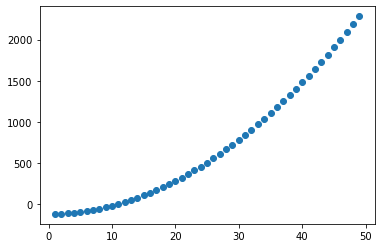

In [79]:
#Here, we will have a scatter plot of the data to examine it
plt.scatter(x1,x2)

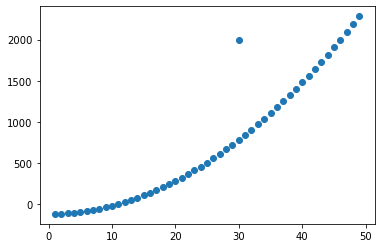

In [80]:
#We will then intentionally add an outlier into our data
#Then observe it's scatter plot.
x1 = np.append(x1,30)
x2 = np.append(x2,2000)
data = np.stack((x1,x2),axis=1)
plt.scatter(x1,x2)

We will now try to detect these outlier that we have added
We will calculate the probability for each datapoint and if its probability of occurence is lower than threshold, then it is an outlier. Like before, we will chose the threshold manually. 

In [82]:
#Import an additional library
from scipy.stats import multivariate_normal

In [83]:
#This part calculates the covariance matrix
data = np.stack((x1,x2),axis=0)
covariance_matrix = np.cov(data)

In [84]:
#This part calculates the mean
mean_values = [np.mean(x1),np.mean(x2)]

In [85]:
#This part models the multivariate_normal_distribution
model = multivariate_normal(cov=covariance_matrix,mean=mean_values)
data = np.stack((x1,x2),axis=1)

In [86]:
#This parts then defines how to find the outliers
threshhold = 1.0e-07
outlier = model.pdf(data).reshape(-1) < threshhold

In [87]:
for boolean,i in enumerate(outlier):
  if i == True:
    print("The outlier is", data[boolean])

The outlier is [  30 2000]
